In [1]:
#-----------
# Data cleaning for test dataset
#-----------

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# use only for dictionary parsing...
import ast

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
dataTestPlutchik = pd.read_csv('test/emotion/allcharlinepairs-original.csv')

# Check data basic info

In [3]:
print("Shape info: ", dataTestPlutchik.shape)
dataTestPlutchik

Shape info:  (51891, 9)


,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,a3e66276-ef27-426f-8a2f-329779f17038,1,Cook,ann0,NaN,A cook was carrying an armful of oranged in th...,yes,"[""joy""]","[""joy:3"", ""trust:3"", ""surprise:2"", ""anticipati..."
1,a3e66276-ef27-426f-8a2f-329779f17038,1,Cook,ann1,NaN,A cook was carrying an armful of oranged in th...,yes,"[""useful"", ""nervous""]","[""joy:2"", ""anticipation:2""]"
2,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann0,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,"[""annoyed""]","[""fear:2"", ""surprise:2"", ""anticipation:2""]"
3,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann1,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,"[""angry at himself"", ""disgusted""]","[""disgust:2"", ""anger:3""]"
4,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann2,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,"[""frustrated""]","[""surprise:2"", ""anger:2""]"
...,...,...,...,...,...,...,...,...,...
51886,9b53627e-41e5-47e6-9c6c-74d485572958,4,Rosemary,ann0,Rosemary was eating a snack.|She was at a part...,"After she stuffed herself, she regretted it.",yes,"[""gross""]","[""disgust:3""]"
51887,9b53627e-41e5-47e6-9c6c-74d485572958,4,Rosemary,ann1,Rosemary was eating a snack.|She was at a part...,"After she stuffed herself, she regretted it.",yes,"[""regret""]","[""sadness:2""]"
51888,9b53627e-41e5-47e6-9c6c-74d485572958,5,Rosemary,ann0,Rosemary was eating a snack.|She was at a part...,Rosemary swore to eat healthier tomorrow.,yes,"[""to continue dieting""]","[""joy:2"", ""trust:3"", ""anticipation:2""]"
51889,9b53627e-41e5-47e6-9c6c-74d485572958,5,Rosemary,ann1,Rosemary was eating a snack.|She was at a part...,Rosemary swore to eat healthier tomorrow.,yes,"[""ashamed""]","[""sadness:2"", ""disgust:2"", ""anger:2""]"


# Start modification

## 1. emotion
### 1.1 Basic Filter

In [115]:
# emotion col analyze
# emotion部分的脏数据
# 0. 无效emotion
# 0.1 和sentence一致
dataTestPlutchik = dataTestPlutchik[[x.strip('[').strip(']').strip('\"').strip().replace(".", "") + "." 
                                   for x in dataTestPlutchik['emotion']] != dataTestPlutchik['sentence']]

In [92]:
# 0.2 like something...
dataTestPlutchik = dataTestPlutchik[~ dataTestPlutchik['emotion'].str.lower().str.contains("like")]

# 0.3 to do something...
dataTestPlutchik = dataTestPlutchik[~ dataTestPlutchik['emotion'].str.lower().str.contains("to ")]

# 1. 并列
connectorList = [" and also ", " and ", " but "]
for connector in connectorList:
    dataTestPlutchik['emotion'] = dataTestPlutchik['emotion'].str.lower().str.replace(connector, "\", \"") # 顺便统一大小写

# 2. 副词（不一定要去除其实）
decoratorList = ["very ", " a lot", " a bit", "a bit ", "little bit ", "little ", "so "]
for decorator in decoratorList:
    dataTestPlutchik['emotion'] = dataTestPlutchik['emotion'].str.replace(decorator, "")
    
# 3. 目的与原因
reasonIndentifierList = [" to", " that", " (", " about", " of", " for", " at", " in", " with", 
                         " by", " while", " on", " from", " if", " when", ":", " since"]
for reasonIndentifier in reasonIndentifierList:
    dataTestPlutchik['emotion'] = dataTestPlutchik['emotion'].str.partition("\"]")[0].str.partition(reasonIndentifier)[0]+ "\"]"
    
# 4. Special case: 省略化的从句
identityList = [" they", " he", " hes", " someone", " she", " i"]
for identity in identityList:
    dataTestPlutchik['emotion'] = dataTestPlutchik['emotion'].str.partition("\"]")[0].str.partition(identity)[0]+ "\"]"

In [93]:
# remove none annotator
dataTestPlutchik = dataTestPlutchik[~ (dataTestPlutchik['emotionworkerid'].str.contains("none"))]

In [94]:
# remove none row
noneIndicatorList = ["none", "nothing", "unsure", "n/a", "not sure", "not applicable", "no emotion"]
for noneIndicator in noneIndicatorList:
    dataTestPlutchik = dataTestPlutchik[~ (dataTestPlutchik['emotion'].str.contains(noneIndicator))]
    print("None Case deleted, current shape info update to:", dataTestPlutchik.shape)

None Case deleted, current shape info update to: (43248, 9)
None Case deleted, current shape info update to: (43232, 9)
None Case deleted, current shape info update to: (43220, 9)
None Case deleted, current shape info update to: (43220, 9)
None Case deleted, current shape info update to: (43220, 9)
None Case deleted, current shape info update to: (43214, 9)
None Case deleted, current shape info update to: (43213, 9)


In [4]:
# 习惯性改一下emotion和Plutchik的type, 后续好操作
dataTestPlutchik['emotion'] = [list(i.strip() for i in (x.strip('[').strip(']').strip('\"').strip().replace("\", \"", ", ")
                              .replace("\', \'", ", ").replace("\"", "").replace("`", "").replace("!", "")
                              .replace("[", "").split(', '))) for x in dataTestPlutchik['emotion']]

In [5]:
dataTestPlutchik['plutchik'] = [ast.literal_eval(x.replace(":", "\" : ").replace("\",", ",").replace("[", "{").replace("\"]", "}").replace("]", "}")) 
                               if "none" not in x else {} for x in dataTestPlutchik['plutchik']]

### 1.2 Typo correction

In [97]:
import enchant
from enchant.checker import SpellChecker
#english_vocab = set(w.lower() for w in nltk.corpus.words.words())
d = enchant.Dict("en_US")

In [98]:
emotions = [[str1.strip("\"") for str1 in x] for x in dataTestPlutchik['emotion']]
for i in range(len(emotions)):
    for j in range(len(emotions[i])):
        word = emotions[i][j]
        word = word.strip('.').strip(';').strip(',')
        chkr = SpellChecker("en_US")
        chkr.set_text(word)
        for err in chkr:
            sug = err.suggest()[0]
            err.replace(sug)
        emotions[i][j] = chkr.get_text() #returns corrected text
    print("\r", end="")
    print("1.2 Typo correction -> Start checking, current progress: {}/{} ".format(i+1, len(emotions)), end="")

1.2 Typo correction -> Start checking, current progress: 43213/43213 

In [99]:
wrongwords = []
for lw in emotions:
    for word in lw:
        if(word.find(' ') == -1 and len(word)>0 and d.check(word)==False):
            print(lw)
            wrongwords.append(word)
wrongwords

[]

In [100]:
dataTestPlutchik['emotion'] = emotions
dataTestPlutchik['emotion']

0                    [joy]
1        [useful, nervous]
2                [annoyed]
3                  [angry]
4             [frustrated]
               ...        
51885           [famished]
51886              [gross]
51887             [regret]
51889            [ashamed]
51890        [comfortable]
Name: emotion, Length: 43213, dtype: object

### 1.3 Other explicit delete

In [101]:
# 特项修改 for test
dataTestPlutchik['emotion'][4514] = ['fun'] # original ['fun doing something else']
dataTestPlutchik['emotion'][10162] = ['satisfied'] # original ['fun doing something else']
dataTestPlutchik['emotion'][13415] = ['bad'] # original ['not good enough']
dataTestPlutchik['emotion'][21612] = ['happy'] # original ['glad the shop is closer']
dataTestPlutchik['emotion'][26555] = ['nervous'] # original ["nervous she'll see"]
dataTestPlutchik['emotion'][28070] = ['disappointed'] # original ['disappointed his playtime will be nerved']
dataTestPlutchik['emotion'][29702] = ['excited'] # original ['excited watch movie']
dataTestPlutchik['emotion'][30032] = ['relieved'] # original ['relieved brother is safe']  
dataTestPlutchik['emotion'][30634] = ['expecting'] # original ['expecting a positive experience']  
dataTestPlutchik['emotion'][32095] = ['relieved'] # original ['dangerous situation left']  
dataTestPlutchik['emotion'][33674] = ['disappointed'] # original ["disappointed the trick didn't work"] 
dataTestPlutchik['emotion'][37427] = ['happy'] # original ['happy there are good people'] 

In [ ]:
# 杂项清除
listTotal = dataTestPlutchik['emotion']
print("curious data still...")
for index, value in listTotal.items():
    if (len(value) == 1 and value[0].count(" ") > 1):
        dataTestPlutchik = dataTestPlutchik.drop(index = index)
        print("going to remove: ", value, " @",  index)
    else:
        dataTestPlutchik['emotion'][index] = list(emotion for emotion in dataTestPlutchik['emotion'][index] if emotion.count(" ") < 1)

In [102]:
# 杂项清除，但只清理单个句子
listTotal = dataTestPlutchik['emotion']
print("curious data still...")
for index, value in listTotal.items():
    if (len(value) == 1 and value[0].count(" ") > 1):
        dataTestPlutchik = dataTestPlutchik.drop(index = index)
        print("going to remove: ", value, " @",  index)

curious data still...
going to remove:  ['as good team member']  @ 9688
going to remove:  ['her husband should fill']  @ 13337
going to remove:  ['well taken care']  @ 14832
going to remove:  ['above everyone else']  @ 16874
going to remove:  ['wanted new house']  @ 17838
going to remove:  ['i made a good choice']  @ 17968
going to remove:  ["he's getting an addiction"]  @ 21804
going to remove:  ['he learned a lesson']  @ 22409
going to remove:  ['completely let down']  @ 24346
going to remove:  ['that his dream comes true']  @ 26618
going to remove:  ['included as a guest']  @ 29458
going to remove:  ['he should never drink milk']  @ 31986
going to remove:  ['that employed are lazy']  @ 33028
going to remove:  ["he's not assertive enough"]  @ 34849
going to remove:  ['he just let']  @ 36139
going to remove:  ['about secure life']  @ 43803
going to remove:  ['his work will get easy']  @ 45003
going to remove:  ['a bad taste']  @ 46031


In [6]:
# 优化 index
dataTestPlutchik = dataTestPlutchik.reset_index()
dataTestPlutchik = dataTestPlutchik.drop(labels='index',axis=1)
dataTestPlutchik.index.names = ['index']
dataTestPlutchik = dataTestPlutchik.reset_index()

### 1.4 Check distribution

In [7]:
dataTestPlutchik

,index,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,0,a3e66276-ef27-426f-8a2f-329779f17038,1,Cook,ann0,NaN,A cook was carrying an armful of oranged in th...,yes,[joy],"{'joy': 3, 'trust': 3, 'surprise': 2, 'anticip..."
1,1,a3e66276-ef27-426f-8a2f-329779f17038,1,Cook,ann1,NaN,A cook was carrying an armful of oranged in th...,yes,"[useful, nervous]","{'joy': 2, 'anticipation': 2}"
2,2,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann0,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,[annoyed],"{'fear': 2, 'surprise': 2, 'anticipation': 2}"
3,3,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann1,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,"[angry at himself, disgusted]","{'disgust': 2, 'anger': 3}"
4,4,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann2,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,[frustrated],"{'surprise': 2, 'anger': 2}"
...,...,...,...,...,...,...,...,...,...,...
51886,51886,9b53627e-41e5-47e6-9c6c-74d485572958,4,Rosemary,ann0,Rosemary was eating a snack.|She was at a part...,"After she stuffed herself, she regretted it.",yes,[gross],{'disgust': 3}
51887,51887,9b53627e-41e5-47e6-9c6c-74d485572958,4,Rosemary,ann1,Rosemary was eating a snack.|She was at a part...,"After she stuffed herself, she regretted it.",yes,[regret],{'sadness': 2}
51888,51888,9b53627e-41e5-47e6-9c6c-74d485572958,5,Rosemary,ann0,Rosemary was eating a snack.|She was at a part...,Rosemary swore to eat healthier tomorrow.,yes,[to continue dieting],"{'joy': 2, 'trust': 3, 'anticipation': 2}"
51889,51889,9b53627e-41e5-47e6-9c6c-74d485572958,5,Rosemary,ann1,Rosemary was eating a snack.|She was at a part...,Rosemary swore to eat healthier tomorrow.,yes,[ashamed],"{'sadness': 2, 'disgust': 2, 'anger': 2}"


In [105]:
# 看一下内容状态
# count related
# 每个emotion x 在总字典X[x]中先记录一次freq，
# 然后同case下的其它情感yi \in {[y1, ..., yn], s.t. yi != x}记录一下freq到Y[x][yi]
emotionSum = {}
for dataRow in dataTestPlutchik['emotion']:
    for emotion in dataRow:
        if emotion in emotionSum:
            relatedEmotionDict = emotionSum.get(emotion)[1];
            for relatedEmotion in dataRow:
                if relatedEmotion != emotion:
                    relatedEmotionDict[relatedEmotion] = relatedEmotionDict.get(relatedEmotion, 0) + 1
            emotionSum[emotion] = [emotionSum.get(emotion)[0]+1, relatedEmotionDict];
        else:
            emotionSum[emotion] = [1, {}];

In [106]:
emotionDF = pd.DataFrame(list(zip(emotionSum.keys(),[x[0] for x in emotionSum.values()], 
                                  [list(x[1].keys())[0:5] for x in emotionSum.values()],[x[1] for x in emotionSum.values()])), 
                         columns = ['emotion','freq','highly related', 'all related info'])
emotionDFTop40 = emotionDF.sort_values(by=['freq'], na_position='first', ascending=False)[0:40]

In [107]:
emotionDFTop40

,emotion,freq,highly related,all related info
37,happy,4833,"[pleased, surprise, excitement, relieved, peac...","{'pleased': 3, 'surprise': 13, 'excitement': 1..."
13,excited,2460,"[happy, fear, anxious, cultured, appreciative]","{'happy': 292, 'fear': 1, 'anxious': 14, 'cult..."
17,sad,1931,"[disgusted, irresponsible, angry, disappointed...","{'disgusted': 7, 'irresponsible': 1, 'angry': ..."
3,annoyed,1064,"[irritated, frustrated, hungry, relieved, star...","{'irritated': 5, 'frustrated': 19, 'hungry': 1..."
101,proud,1056,"[excited, accomplish, sad, anxious, tired]","{'excited': 27, 'accomplish': 1, 'sad': 3, 'an..."
34,scared,1013,"[sad, confused, trapped, nervous, pain]","{'sad': 18, 'confused': 7, 'trapped': 1, 'nerv..."
49,disappointed,1009,"[sad, angry, upset, feel bad, unhappy]","{'sad': 57, 'angry': 36, 'upset': 21, 'feel ba..."
4,angry,930,"[sad, disappointed, unhappy, worried, embarras...","{'sad': 52, 'disappointed': 36, 'unhappy': 7, ..."
68,relieved,928,"[happy, peaceful, safe, annoyed, guilty]","{'happy': 58, 'peaceful': 2, 'safe': 1, 'annoy..."
2,nervous,863,"[afraid, embarrassed, scared, lucky, vulnerable]","{'afraid': 6, 'embarrassed': 3, 'scared': 37, ..."


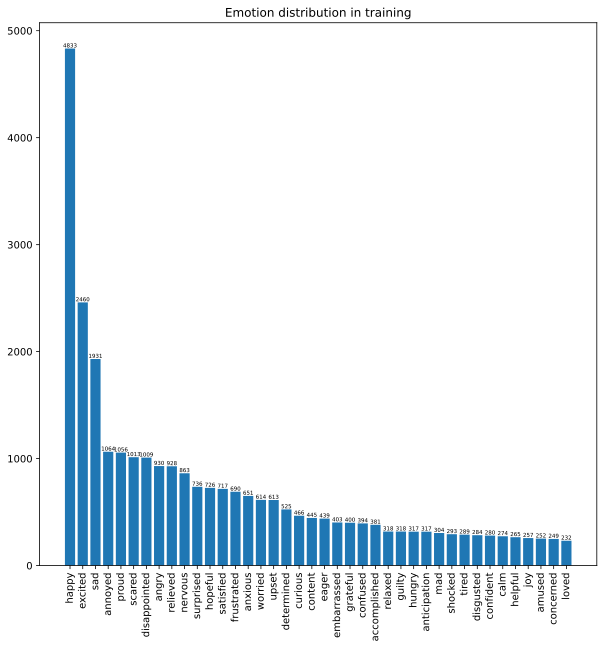

In [108]:
plt.rcParams['figure.figsize'] = (10.0, 10.0) 
plt.bar(emotionDFTop40['emotion'], emotionDFTop40['freq'])
plt.xticks(rotation=90) # 东西太多，旋转
plt.title("Emotion distribution in training")
for emotion, freq in zip(emotionDFTop40['emotion'], emotionDFTop40['freq']):
    plt.text(emotion, freq, freq, ha='center', va='bottom', fontsize=5.5)
plt.show()

## 2. plutchik
### 2.1 Standard plutchik(including no emotion case)

In [8]:
for index, row in dataTestPlutchik.iterrows():
    tempalteOrder = {'joy' : 0, 'trust' : 0, 'fear' : 0, 'surprise' : 0, 'sadness' : 0, 'disgust' : 0, 'anger' : 0, 'anticipation' : 0}
    for key, value in row['plutchik'].items():
        tempalteOrder[key] = value
    dataTestPlutchik['plutchik'][index] = tempalteOrder.copy()
    print("\r", end="")
    print("2.1 Standard plutchik(including no emotion case) -> start conversion, current progress: {}/{} ".format(index+1, dataTestPlutchik.shape[0]), end="")

2.1 Standard plutchik(including no emotion case) -> start conversion, current progress: 51891/51891 

### 2.2 Voting

In [9]:
mainPosIndex = pd.Series(False, index = dataTestPlutchik.index)
for index, row in dataTestPlutchik.iterrows():
    if (index == 0 or currentEditting['sentence'] != row['sentence']): # case: new sentence, update CURRENT adding
        if (index != 0):
            for key in currentEditting['plutchik']:
                # print(index - currentEditting[0], "previous: ", currentEditting[1]['plutchik'][key])
                currentEditting['plutchik'][key] //= index - currentEditting[0]
            for i in range(currentEditting['index'] + 1, index):
                for emotion in dataTestPlutchik['emotion'][i]:
                    if not emotion in dataTestPlutchik['emotion'][currentEditting['index']]:
                        dataTestPlutchik['emotion'][currentEditting['index']].append(emotion)
        currentEditting = dataTestPlutchik.iloc[index]
        mainPosIndex[currentEditting['index']] = True
    else: # case: same as previous sentence, do voting
        for key, value in dataTestPlutchik['plutchik'][index].items():
            dataTestPlutchik['plutchik'][currentEditting['index']][key] += value
    print("\r", end="")
    print("2.2 Voting -> start voting, current progress: {}/{} ".format(index+1, dataTestPlutchik.shape[0]), end="")
    
# dealing last case
for key in currentEditting['plutchik']:
    # print(index - currentEditting[0], "previous: ", currentEditting[1]['plutchik'][key])
    currentEditting['plutchik'][key] //= index - currentEditting[0]
for i in range(currentEditting['index'] + 1, index):
    for emotion in dataTestPlutchik['emotion'][i]:
        if not emotion in dataTestPlutchik['emotion'][currentEditting['index']]:
            dataTestPlutchik['emotion'][currentEditting['index']].append(emotion)

2.2 Voting -> start voting, current progress: 51891/51891 

In [10]:
dataTestPlutchik = dataTestPlutchik[mainPosIndex]
dataTestPlutchik = dataTestPlutchik.drop(labels='index',axis=1)
dataTestPlutchik = dataTestPlutchik.reset_index()
dataTestPlutchik = dataTestPlutchik.drop(labels='index',axis=1)

# Finish

In [11]:
dataTestPlutchik

,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,a3e66276-ef27-426f-8a2f-329779f17038,1,Cook,ann0,NaN,A cook was carrying an armful of oranged in th...,yes,"[joy, useful, nervous]","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
1,a3e66276-ef27-426f-8a2f-329779f17038,2,Cook,ann0,A cook was carrying an armful of oranged in th...,He dropped one on the floor by accident.,yes,"[annoyed, angry at himself, disgusted, frustra...","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ..."
2,a3e66276-ef27-426f-8a2f-329779f17038,3,Cook,ann0,A cook was carrying an armful of oranged in th...,As a joke he pretended that it was a soccer ball.,yes,"[amused, Playful, embarassed]","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ..."
3,a3e66276-ef27-426f-8a2f-329779f17038,4,Cook,ann0,A cook was carrying an armful of oranged in th...,He kicked the orange across the kitchen.,yes,"[playful, Angry]","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
4,a3e66276-ef27-426f-8a2f-329779f17038,5,Cook,ann0,A cook was carrying an armful of oranged in th...,It landed in a pot and he cheered!,yes,"[great, amused, surprised, delighted]","{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ..."
...,...,...,...,...,...,...,...,...,...
11845,9b53627e-41e5-47e6-9c6c-74d485572958,1,Rosemary,none,NaN,Rosemary was eating a snack.,no,[none],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ..."
11846,9b53627e-41e5-47e6-9c6c-74d485572958,2,Rosemary,ann0,Rosemary was eating a snack.,She was at a party that had amazing food set out.,yes,"[glad, satisfied, excited]","{'joy': 3, 'trust': 2, 'fear': 0, 'surprise': ..."
11847,9b53627e-41e5-47e6-9c6c-74d485572958,3,Rosemary,ann0,Rosemary was eating a snack.|She was at a part...,She had been dieting for weeks and was starving.,yes,"[Agitated, deprived, famished]","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ..."
11848,9b53627e-41e5-47e6-9c6c-74d485572958,4,Rosemary,ann0,Rosemary was eating a snack.|She was at a part...,"After she stuffed herself, she regretted it.",yes,"[gross, regret]","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ..."


In [27]:
# output - case: emotion cleaning: full processes
dataTestPlutchik.to_csv('test/emotion/allcharlinepairs-clean-v1.csv')

In [25]:
# output - case: emotion cleaning: no annotator combination
dataTestPlutchik = dataTestPlutchik.drop(labels='index',axis=1)
dataTestPlutchik.to_csv('test/emotion/allcharlinepairs-clean-noCombin-v1.csv')

In [51]:
# output - case: emotion cleaning: keep short phases(e.g. "well satisfied") in emotion
dataTestPlutchik.to_csv('test/emotion/allcharlinepairs-clean-phase-v1.csv')

In [111]:
# output - case: emotion cleaning: no annotator combination + keep short phases(e.g. "well satisfied") in emotion
dataTestPlutchik = dataTestPlutchik.drop(labels='index',axis=1)
dataTestPlutchik.to_csv('test/emotion/allcharlinepairs-clean-phase-noCombin-v1.csv')

In [15]:
# output - case: only remove cheat sentence in emotion
dataTestPlutchik.to_csv('test/emotion/allcharlinepairs-original-noCheat-v1.csv')

In [10]:
# output - case: only remove cheat sentence in emotion + no annotator combination
dataTestPlutchik.to_csv('test/emotion/allcharlinepairs-original-noCheat-noCombin-v1.csv')

In [12]:
# output - case: no emotion cleaning, no plutchik voting, only stanardrized plutchik data with annotator combination
dataTestPlutchik.to_csv('test/emotion/allcharlinepairs-original-plutchik-v1.csv')

In [ ]:
# output - case: no emotion cleaning, no plutchik voting, only stanardrized plutchik data
dataTestPlutchik.to_csv('test/emotion/allcharlinepairs-original-plutchik-noCombin-v1.csv')